# RL Analysis Continued—Exploratory Visualizations

## Part II: Exploratory Visualizations

## Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ^ remember to remove numpy / other packages if you don't end up using them

## Loading in our dataframes

In [3]:
df = pd.read_pickle("/Users/Terru/Desktop/RL-Analysis/dataframes/df.pkl")
blue_players = pd.read_pickle("/Users/Terru/Desktop/RL-Analysis/dataframes/blue_players.pkl")
orange_players = pd.read_pickle("/Users/Terru/Desktop/RL-Analysis/dataframes/orange_players.pkl")

## Playing around with some visualizations

Let's begin by visualising demos inflicted in-game over time:

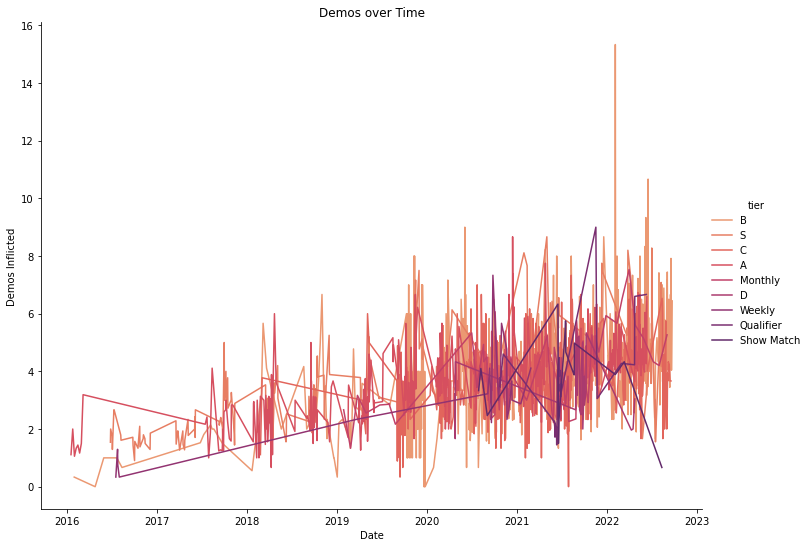

In [7]:
palette = sns.color_palette("flare", n_colors=9)

demos_over_time = sns.relplot(x="date", y="stats.demo.inflicted",
            kind="line", data=blue_players, hue="tier", ci=None, palette=palette,
            height=7.5, aspect=10/7.5)
demos_over_time.ax.set_title("Demos over Time")
demos_over_time.set_axis_labels("Date" , "Demos Inflicted")

This is immediately pretty cool. We can see a clear increase in demos inflicted over time——and can make a reasonable assumption that this is the result of a shift towards more aggressive playstyles characterized by bumps, demos and boost steals.

Unfortunately, it isn't quite clear from this graph whether there is a significant difference in the number of demos per series when we split by tier.

*Note: The graph looks a bit messy, but if we had bootstrapping/confidence interval estimations surrounding our data, I think it would look worse haha so it's a deliberate design choice*

Let's check out any potential outliers:

<AxesSubplot:xlabel='tier', ylabel='stats.demo.inflicted'>

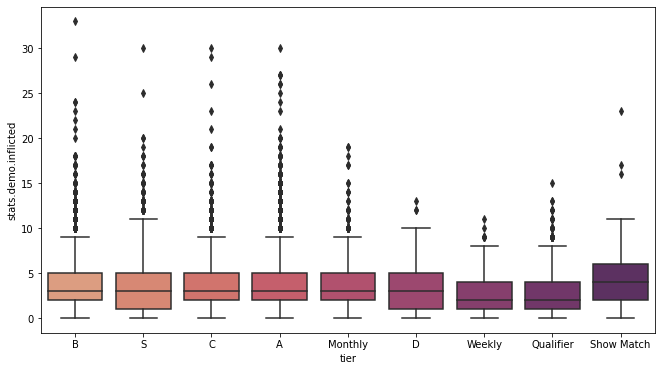

In [8]:
plt.figure(figsize=(11,6))
sns.boxplot(x="tier", y="stats.demo.inflicted", data=blue_players, palette=palette)

There definitely do seem to be many outliers in each tier, falling outside of our 1.5xIQR whiskers. I could be looking too much into it, but aggressive playstyles by one team do tend to elicit increased aggressiveness by the opposing team as a countermeasure strategy (or if they're tilted and just on the hunt), and I would guess many of the outlier series displayed here played out that way.

In [9]:
blue_players.groupby(["tier"])["stats.demo.inflicted"].max()

tier
A             30.0
B             33.0
C             30.0
D             13.0
Monthly       19.0
Qualifier     15.0
S             30.0
Show Match    23.0
Weekly        11.0
Name: stats.demo.inflicted, dtype: float64

#### Idea: find which teams were involved in these outlier series. Maybe there will be a common team who's aggressive af lol

In [10]:
blue_players.groupby(["tier"])["stats.demo.inflicted"].mean()

tier
A             3.924717
B             3.726710
C             3.564802
D             3.272109
Monthly       3.795004
Qualifier     2.673560
S             3.546959
Show Match    4.274882
Weekly        2.974359
Name: stats.demo.inflicted, dtype: float64

#### To-do: Make the above table a graph over time, by just taking intervals of months, or even quarters. Makes for a clean visualisation of the mean demos inflicted by tier

In [12]:
blue_players.groupby("series_id")["stats.core.shots"].mean()

series_id
0        13.666667
1         9.333333
2        12.666667
3         4.000000
4        14.666667
           ...    
35916    19.000000
35917    17.666667
35918    17.000000
35919    19.000000
35920    14.000000
Name: stats.core.shots, Length: 35921, dtype: float64